<a href="https://colab.research.google.com/github/abdullahRahman89/Language_Classes_Data_Analysis/blob/main/Language_Classes_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-1: Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step-2: Load Data

In [30]:
# opening the csv file
df = pd.read_csv("/content/dataset_14_Language Classes.csv")
print(df)

output = []
output.append("Exploratery Data Analysis of Languege_Classes \n")
output.append(f"{'-'*20} \n")
print(output)



           Date   Product Region Customer_Type  Quantity   Price  Discount  \
0    2024-12-29   Spanish   West       Student        23   63.24      0.27   
1    2024-12-15   Spanish  South  Professional         9  223.05      0.24   
2    2024-01-20  Mandarin   West  Professional         2   61.87      0.09   
3    2024-04-19   Spanish  North  Professional        13  432.51      0.17   
4    2024-11-03  Mandarin  North       Student        12  460.02      0.25   
..          ...       ...    ...           ...       ...     ...       ...   
995  2024-12-09   Spanish   East       Student         2  103.91      0.18   
996  2024-08-22  Mandarin  North  Professional        20  282.53      0.04   
997  2024-10-08    French   West  Professional         5  154.57      0.20   
998  2024-03-16    German  South       Student        19  335.06      0.28   
999  2024-01-14    German  North  Professional        23  282.42      0.24   

     Revenue  
0    1061.80  
1    1525.66  
2     112.60  
3  

In [32]:
df.head(1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


,Quantity,Price,Discount,Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,15.134000,269.077720,0.151330,3457.052440
std,8.588469,128.621881,0.087781,2780.718514
min,1.000000,50.280000,0.000000,45.770000
25%,7.000000,159.375000,0.080000,1254.150000
50%,15.000000,262.745000,0.150000,2617.705000
75%,22.000000,382.722500,0.230000,5076.942500
max,30.000000,499.310000,0.300000,12549.730000


step-3: Cleaning Data

In [7]:
output.append("Data Cleaning Result")
missing_values = df.isnull().sum()
print(missing_values)


output.append(f"Missing Values: {missing_values}")

df.dropna(inplace=True)

# Convert the data colums to datetime format
df["Date"] = pd.to_datetime(df["Date"])


Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


Duplicate Row Delete

In [8]:
duplicate = df.duplicated().sum()
output.append(f"Duplicate Values: {duplicate}")
df.drop_duplicates(inplace=True)
print(duplicate)

0


step-4: Analys The Data

In [9]:
total_revenue = df["Revenue"].sum()
output.append("Total Revenue: ${total_revenue}")
print(f"Total Revenue: ${total_revenue}")

Total Revenue: $3457052.44


In [13]:
customer_type_grp = df.groupby("Customer_Type")["Revenue"].mean()
output.append(f"Customer Type Revenue: {customer_type_grp}")
print(f"Customer Type Revenue: {customer_type_grp}")
print(type(customer_type_grp))
print(customer_type_grp.size)

Customer Type Revenue: Customer_Type
Professional    3473.637535
Student         3440.795762
Name: Revenue, dtype: float64
<class 'pandas.core.series.Series'>
2


In [34]:
print(df.isnull().sum())
sorted_df = df.sort_values("Revenue")
print(sorted_df)

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64
           Date   Product Region Customer_Type  Quantity   Price  Discount  \
509  2024-07-11    French  North       Student         1   61.85      0.26   
325  2024-01-10    French   East  Professional         1   66.02      0.02   
205  2024-04-18   Spanish   West  Professional         1   94.34      0.08   
192  2024-08-02    French  South       Student         2   58.92      0.18   
306  2024-03-12   Spanish   East       Student         1  127.79      0.22   
..          ...       ...    ...           ...       ...     ...       ...   
103  2024-08-18    French  South       Student        29  472.29      0.10   
769  2024-03-29    French   East       Student        27  469.07      0.02   
478  2024-01-17  Mandarin  North       Student        28  482.46      0.08   
614  2024-09-04  Mandarin  North       Student        2

In [18]:
total_area = df["Region"].value_counts()
print(total_area)

Region
North    267
West     252
East     250
South    231
Name: count, dtype: int64


In [20]:
# Total price of Region

cost_grp_area = df.groupby("Region")['Revenue'].sum()
print("Total Price of Region")
for index, cost in cost_grp_area.items():
  output.append(f"{index}: {cost}")
  print(f"{index}: {cost}")

# print(type(cost_grp_area))
print(cost_grp_area)

Total Price of Region
East: 871633.32
North: 935848.08
South: 797056.68
West: 852514.36
<class 'pandas.core.series.Series'>
Region
East     871633.32
North    935848.08
South    797056.68
West     852514.36
Name: Revenue, dtype: float64


Step-5: Region average Cost

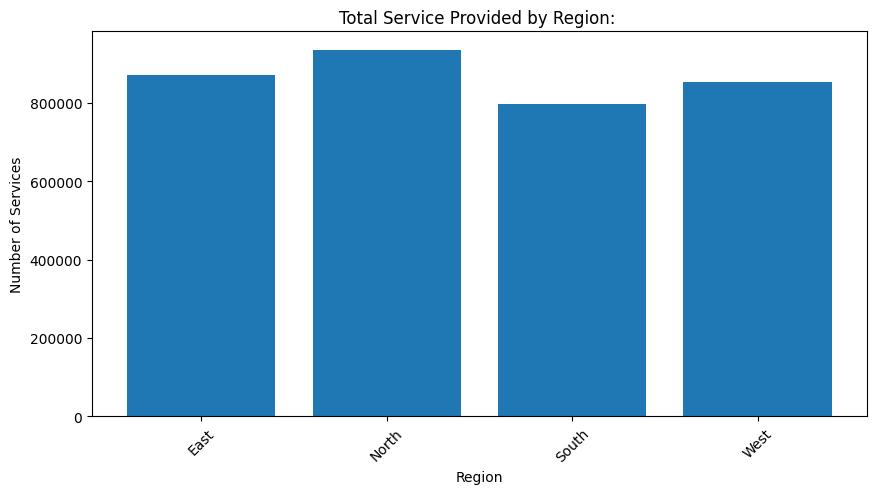

In [35]:
plt.figure(figsize = (10,5))
plt.bar(cost_grp_area.index, cost_grp_area.values)
plt.title("Total Service Provided by Region: ")
plt.xlabel("Region")
plt.ylabel("Number of Services")
plt.xticks(rotation = 45)
plt.savefig("Total_Services_by_Region.png")
plt.show()

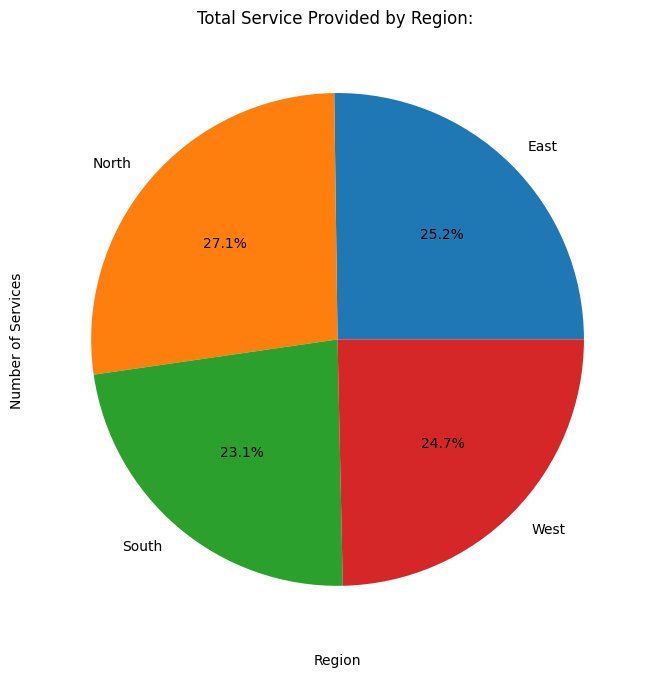

In [37]:
plt.figure(figsize = (8,8))
plt.pie(
    cost_grp_area.values,
    labels = cost_grp_area.index,
    autopct = "%1.1f%%",
)
plt.title("Total Service Provided by Region: ")
plt.xlabel("Region")
plt.ylabel("Number of Services")
plt.xticks(rotation = 45)
plt.savefig("Total_Services_by_Region.png")
plt.show()

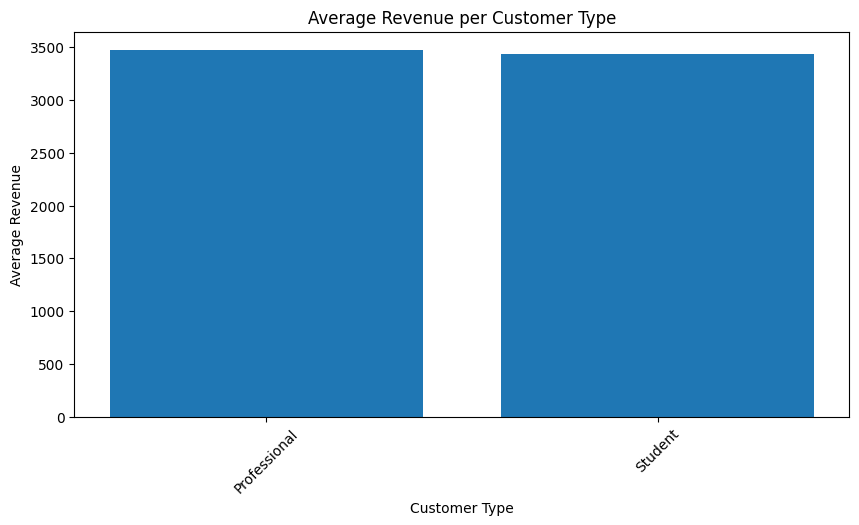

In [42]:
avg_price_per_type = df.groupby("Customer_Type")["Revenue"].mean() # Calculate the mean instead of the entire group
plt.figure(figsize=(10, 5))
plt.bar(avg_price_per_type.index, avg_price_per_type.values)
plt.title("Average Revenue per Customer Type") # More descriptive title
plt.xlabel("Customer Type") # Correct x-axis label
plt.ylabel("Average Revenue") # Correct y-axis label
plt.xticks(rotation=45)
plt.savefig("Average_Revenue_per_Customer_Type.png") # More descriptive filename
plt.show()

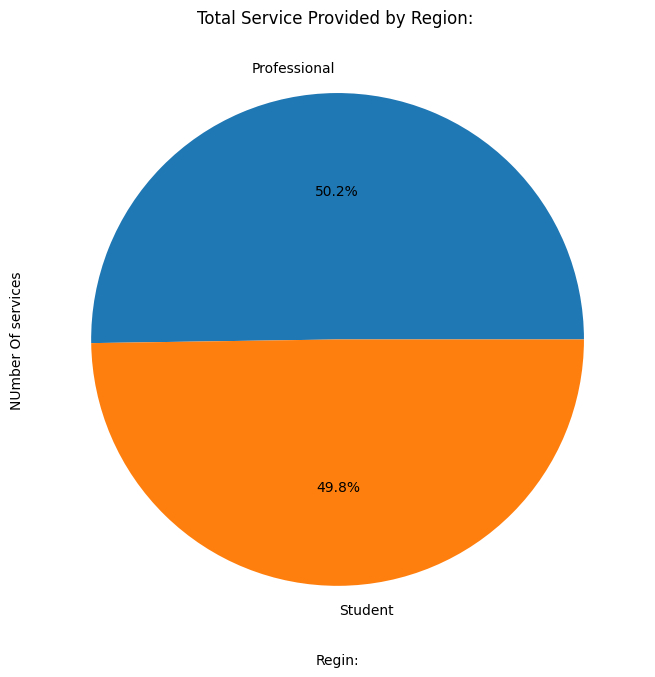

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(
    avg_price_per_type,
    labels=avg_price_per_type.index,
    autopct='%1.1f%%',
    )
plt.title("Total Service Provided by Region: ")
plt.xlabel("Regin:")
plt.ylabel("NUmber Of services")
plt.xticks(rotation = 45)
plt.savefig("total_services__by_region.png")
plt.show()

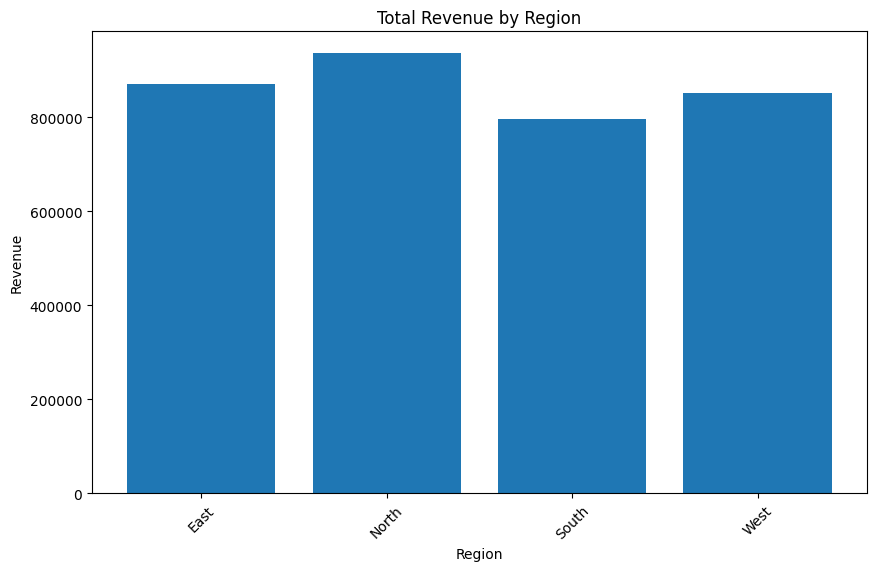

In [44]:
revenue_of_region_grp = df.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(10, 6))
# Use revenue_of_region_grp.index as the x-axis labels
plt.bar(revenue_of_region_grp.index, revenue_of_region_grp.values)
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.savefig("revenue_grp.png")
plt.show()

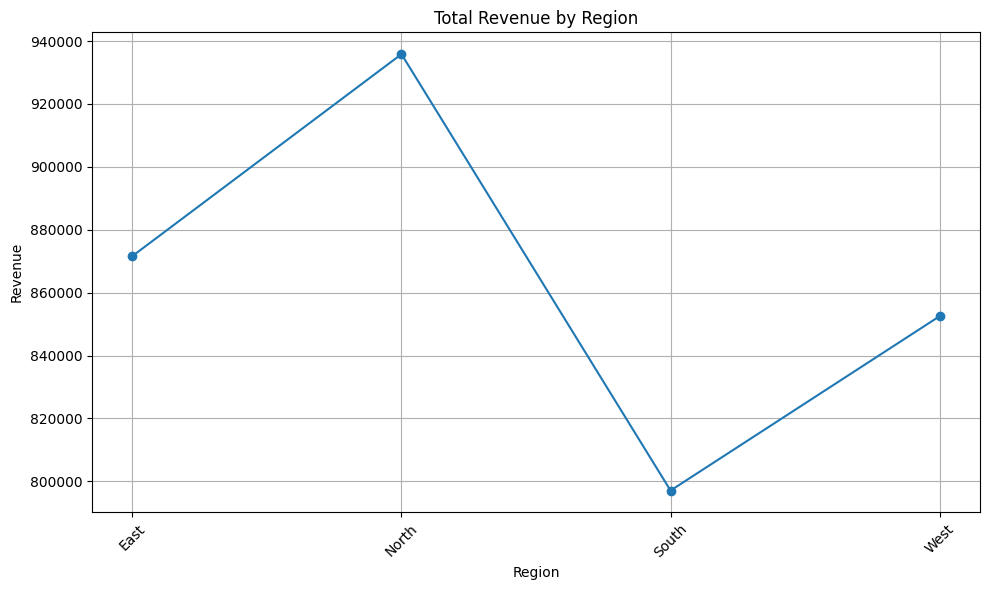

In [47]:
# prompt: make line chart with the df data

import matplotlib.pyplot as plt

# Assuming 'revenue_of_region_grp' is already defined as in your provided code

plt.figure(figsize=(10, 6))
plt.plot(revenue_of_region_grp.index, revenue_of_region_grp.values, marker='o', linestyle='-')  # Create a line plot
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True) # Add grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig("revenue_by_region_line.png")
plt.show()

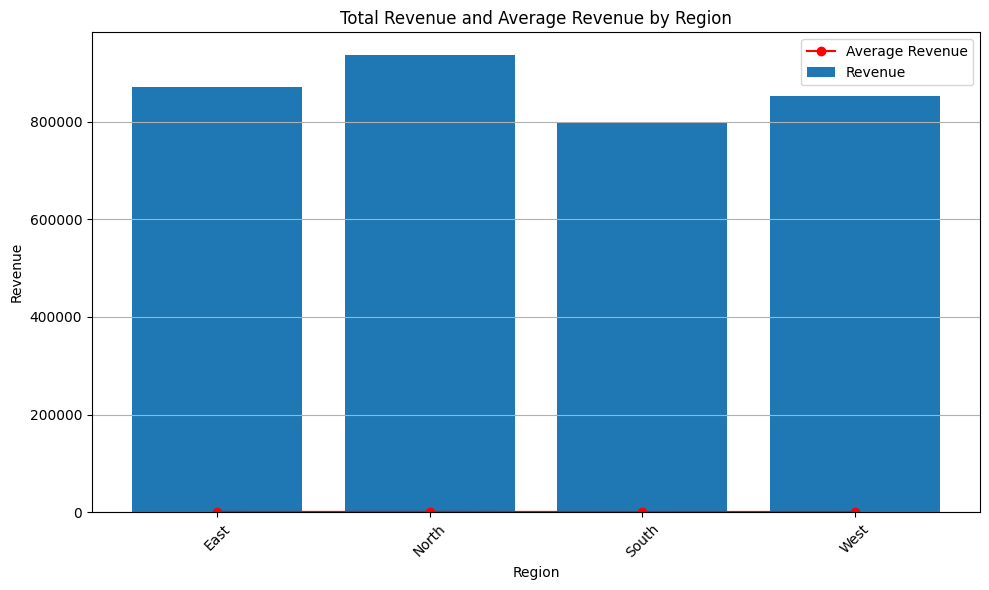

In [48]:
# prompt: make a combo chart with df data

import matplotlib.pyplot as plt

# Assuming 'revenue_of_region_grp' is already defined as in your provided code
# and contains the total revenue for each region

plt.figure(figsize=(10, 6))

# Bar plot for revenue
plt.bar(revenue_of_region_grp.index, revenue_of_region_grp.values, label='Revenue')

# Line plot for a second data series (example: average revenue per region)
# Replace this with your actual data if available
average_revenue_per_region = revenue_of_region_grp / len(df) # Example calculation
plt.plot(average_revenue_per_region.index, average_revenue_per_region.values, marker='o', linestyle='-', color='red', label='Average Revenue')


plt.title("Total Revenue and Average Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend() # Show the legend
plt.grid(True, axis='y')  # Add gridlines only to the y-axis
plt.tight_layout()
plt.savefig("combo_chart_revenue.png")
plt.show()

Last Step: Save data as File

In [45]:
with open('analysis_output.txt','a') as f:
  f.writelines(output)